In [ ]:
import glob
import time
import pandas as pd
from nltk import ngrams
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from tensorflow import keras

In [ ]:
import pandas as pd
import os

In [ ]:
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/SQLI/sqli_modified.csv',encoding='utf-8')

In [ ]:
df.head()

,Sentence,Label,Class
0,a,1,SQLI
1,a',1,SQLI
2,a' --,1,SQLI
3,a' or 1 = 1; --,1,SQLI
4,@,1,SQLI


In [ ]:
df.tail()

,Sentence,Label,Class
4194,"org/?option = com_k2 <a href = ""http://corfopym",0,NORMAL
4195,com/?option = com_k2 <act> <![CDATA[procMemb...,0,NORMAL
4196,picsearch,0,NORMAL
4197,com/is?-WZx-uhyLezKNiYLvAbKL3W4oh5F749nr2KUmFF...,0,NORMAL
4198,de]]> </email_address> <find_account_answer...,0,NORMAL


In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4185 entries, 0 to 4198
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  4185 non-null   object
 1   Label     4185 non-null   int64 
 2   Class     4185 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.8+ KB


In [ ]:
values = df.values

In [ ]:
# vectorization of data

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer( min_df=2, max_df=0.7, max_features=4096, stop_words=stopwords.words('english'))
posts = vectorizer.fit_transform(df['Sentence'].values.astype('U')).toarray()



In [ ]:
posts.shape

(4185, 4096)

In [ ]:
posts.shape=(4185,64,64,1)

In [ ]:
posts.shape

(4185, 64, 64, 1)

In [ ]:
posts = posts/np.max(posts)

In [ ]:
X=posts

In [ ]:
np.max(posts)

1.0

In [ ]:
y=df['Label']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Importing all necessary libraries
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.wrappers.scikit_learn import KerasClassifier



In [ ]:

model=tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape=(64,64,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(256,activation='relu'),
    #tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 256)        0

In [ ]:
classifier_nn = model.fit(X_train,y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=64)

Epoch 1/10
53/53 [==============================] - 53s 989ms/step - loss: 0.4272 - accuracy: 0.7960 - val_loss: 0.2468 - val_accuracy: 0.8602
Epoch 2/10
53/53 [==============================] - 56s 1s/step - loss: 0.1741 - accuracy: 0.9256 - val_loss: 0.1447 - val_accuracy: 0.9450
Epoch 3/10
53/53 [==============================] - 68s 1s/step - loss: 0.1229 - accuracy: 0.9483 - val_loss: 0.1210 - val_accuracy: 0.9510
Epoch 4/10
53/53 [==============================] - 52s 990ms/step - loss: 0.1046 - accuracy: 0.9543 - val_loss: 0.0941 - val_accuracy: 0.9582
Epoch 5/10
53/53 [==============================] - 55s 1s/step - loss: 0.0889 - accuracy: 0.9609 - val_loss: 0.0841 - val_accuracy: 0.9630
Epoch 6/10
53/53 [==============================] - 52s 984ms/step - loss: 0.0909 - accuracy: 0.9624 - val_loss: 0.0886 - val_accuracy: 0.9642
Epoch 7/10
53/53 [==============================] - 52s 988ms/step - loss: 0.0846 - accuracy: 0.9651 - val_loss: 0.0785 - val_accuracy: 0.9665
Epoch 8/

In [ ]:
pred=model.predict(X_test)

In [ ]:
for i in range(len(pred)):
    if pred[i]>0.5:
        pred[i]=1
    elif pred[i]<=0.5:
        pred[i]=0

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,pred)

0.96415770609319

In [ ]:
def accuracy_function(tp,tn,fp,fn):

    accuracy = (tp+tn) / (tp+tn+fp+fn)

    return accuracy

In [ ]:
def precision_function(tp,fp):

    precision = tp / (tp+fp)

    return precision

In [ ]:
def recall_function(tp,fn):

    recall=tp / (tp+fn)

    return recall

In [ ]:
def confusion_matrix(truth,predicted):

    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0

    for true,pred in zip(truth,predicted):

        if true == 1.0:
            if pred == 1.0:
                true_positive += 1
            elif pred != 1.0:
                false_negative += 1

        elif true == 0.0:
            if pred == 0.0:
                true_negative += 1
            elif pred != 0.0:
                false_positive += 1

    accuracy=accuracy_function(true_positive, true_negative, false_positive, false_negative)
    precision=precision_function(true_positive, false_positive)
    recall=recall_function(true_positive, false_negative)


    return (true_positive, true_negative,
            false_positive, false_negative,
            accuracy,
            precision,
           recall)

In [ ]:
true_positive, true_negative, false_positive, false_negative, accuracy,precision,recall=confusion_matrix(y_test,pred)

In [ ]:
print("true_positive : ", true_positive)
print("true_negative : ", true_negative)
print("false_positive : ",false_positive)
print("false_negative : ", false_negative)

true_positive :  246
true_negative :  561
false_positive :  24
false_negative :  6


In [ ]:
print(" For CNN 3 layer 64 batch size and noramlization \n Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))

 For CNN 3 layer 64 batch size and noramlization 
 Accuracy : 0.96415770609319 
 Precision : 0.9111111111111111 
 Recall : 0.9761904761904762


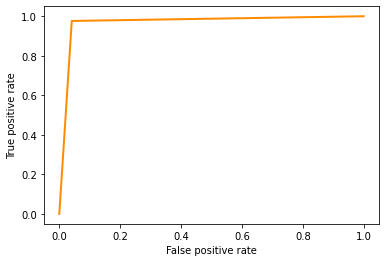

AUC  0.9675824175824177


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

fpr, tpr, _ = roc_curve(y_test, pred)

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()
print("AUC ", roc_auc)

In [ ]:
def draw_confusion_matrix(true_positive, true_negative, false_positive, false_negative):
# total = true_positive + true_negative + false_positive + false_negative
  a = np.asarray([[true_negative,false_positive], [false_negative,true_positive]])
  ax = sns.heatmap(a, annot=True, fmt = "d", cmap="YlGnBu")
  ax.set(xlabel='Predicted Labels', ylabel='True Labels')
  plt.title("Confusion matrix")

In [ ]:
import seaborn as sns

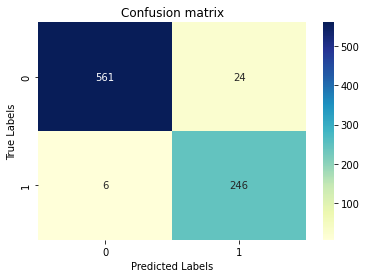

In [ ]:
draw_confusion_matrix(true_positive, true_negative, false_positive, false_negative)


In [ ]:
# Saving the model
from keras.models import load_model
import pickle

model.save('/content/drive/MyDrive/SQLI/my_model.h5')
with open('/content/drive/MyDrive/SQLI/vectorizer_data', 'wb') as fin:
    pickle.dump(vectorizer, fin)

In [ ]:
import keras
from keras.models import load_model
import pickle

mymodel = load_model('/content/drive/MyDrive/SQLI/my_model.h5')
myvectorizer = pickle.load(open("/content/drive/MyDrive/SQLI/vectorizer_data", 'rb'))


In [ ]:
def clean_data(input_val):

    input_val=input_val.replace('\n', '')
    input_val=input_val.replace('%20', ' ')
    input_val=input_val.replace('=', ' = ')
    input_val=input_val.replace('((', ' (( ')
    input_val=input_val.replace('))', ' )) ')
    input_val=input_val.replace('(', ' ( ')
    input_val=input_val.replace(')', ' ) ')
    input_val=input_val.replace('1 ', 'numeric')
    input_val=input_val.replace(' 1', 'numeric')
    input_val=input_val.replace("'1 ", "'numeric ")
    input_val=input_val.replace(" 1'", " numeric'")
    input_val=input_val.replace('1,', 'numeric,')
    input_val=input_val.replace(" 2 ", " numeric ")
    input_val=input_val.replace(' 3 ', ' numeric ')
    input_val=input_val.replace(' 3--', ' numeric--')
    input_val=input_val.replace(" 4 ", ' numeric ')
    input_val=input_val.replace(" 5 ", ' numeric ')
    input_val=input_val.replace(' 6 ', ' numeric ')
    input_val=input_val.replace(" 7 ", ' numeric ')
    input_val=input_val.replace(" 8 ", ' numeric ')
    input_val=input_val.replace('1234', ' numeric ')
    input_val=input_val.replace("22", ' numeric ')
    input_val=input_val.replace(" 8 ", ' numeric ')
    input_val=input_val.replace(" 200 ", ' numeric ')
    input_val=input_val.replace("23 ", ' numeric ')
    input_val=input_val.replace('"1', '"numeric')
    input_val=input_val.replace('1"', '"numeric')
    input_val=input_val.replace("7659", 'numeric')
    input_val=input_val.replace(" 37 ", ' numeric ')
    input_val=input_val.replace(" 45 ", ' numeric ')

    return input_val

In [ ]:
def predict_sqli_attack():

    repeat=True

    beautify=''
    for i in range(20):
        beautify+= "="

    print(beautify)
    input_val=input("Give me some data to work on : ")
    print(beautify)


    if input_val== '0':
        repeat=False



    input_val=clean_data(input_val)
    input_val=[input_val]



    input_val=myvectorizer.transform(input_val).toarray()

    input_val.shape=(1,64,64,1)

    result=mymodel.predict(input_val)


    print(beautify)

    if repeat == True:

        if result>0.5:
            print("ALERT :::: This can be SQL injection")


        elif result<=0.5:
            print("It seems to be safe")

        print(beautify)

        predict_sqli_attack()

    elif repeat == False:
        print( " Good Bye ")




In [ ]:
predict_sqli_attack()

ALERT :::: This can be SQL injection
ALERT :::: This can be SQL injection
It seems to be safe
ALERT :::: This can be SQL injection
It seems to be safe
It seems to be safe
ALERT :::: This can be SQL injection
ALERT :::: This can be SQL injection
It seems to be safe


**Using Machine Learning Approach **

In [ ]:
pip install pywaffle

     |████████████████████████████████| 565 kB 28.4 MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
alt.renderers.enable("default")

from pywaffle import Waffle

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

# Data read
# data = pd.read_csv('nfr.csv')
data = pd.read_csv('/content/drive/MyDrive/SQLI/sqli_modified.csv')

data

,Sentence,Label,Class
0,a,1,SQLI
1,a',1,SQLI
2,a' --,1,SQLI
3,a' or 1 = 1; --,1,SQLI
4,@,1,SQLI
...,...,...,...
4194,"org/?option = com_k2 <a href = ""http://corfopym",0,NORMAL
4195,com/?option = com_k2 <act> <![CDATA[procMemb...,0,NORMAL
4196,picsearch,0,NORMAL
4197,com/is?-WZx-uhyLezKNiYLvAbKL3W4oh5F749nr2KUmFF...,0,NORMAL


In [ ]:
data.head()

,Sentence,Label,Class
0,a,1,SQLI
1,a',1,SQLI
2,a' --,1,SQLI
3,a' or 1 = 1; --,1,SQLI
4,@,1,SQLI


In [ ]:
data.tail()

,Sentence,Label,Class
4194,"org/?option = com_k2 <a href = ""http://corfopym",0,NORMAL
4195,com/?option = com_k2 <act> <![CDATA[procMemb...,0,NORMAL
4196,picsearch,0,NORMAL
4197,com/is?-WZx-uhyLezKNiYLvAbKL3W4oh5F749nr2KUmFF...,0,NORMAL
4198,de]]> </email_address> <find_account_answer...,0,NORMAL


In [ ]:
bars = alt.Chart(data).mark_bar(size=50).encode(
    x=alt.X("Class", axis=alt.Axis(title='Categories')),
    y=alt.Y("count():Q", axis=alt.Axis(title='Frequency')),
    tooltip=[alt.Tooltip('count()', title='Frequency'), 'Class'],
    color='Class'

)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

(bars + text).interactive().properties(
    height=300,
    width=700,
    title = "Distribution of Categories",
)

alt.LayerChart(...)

In [ ]:
print(data['Class'].unique())

['SQLI' 'NORMAL']


In [ ]:
print(data.groupby('Class').size())

Class
NORMAL    3072
SQLI      1127
dtype: int64


In [ ]:
print(data.groupby('Class').count())

        Sentence  Label
Class                  
NORMAL      3060   3072
SQLI        1125   1127


In [ ]:
a= data['Class']=="SQLI"
a.tail()


4194    False
4195    False
4196    False
4197    False
4198    False
Name: Class, dtype: bool

In [ ]:
data['id'] = 1
df2 = pd.DataFrame(data.groupby('Class').count()['id']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('Class'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='Percentage of requirements')),
    color='Class'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.2%')
)

(bars + text).interactive().properties(
    height=300,
    width=700,
    title = "Percentage distribution of categories",
)

alt.LayerChart(...)

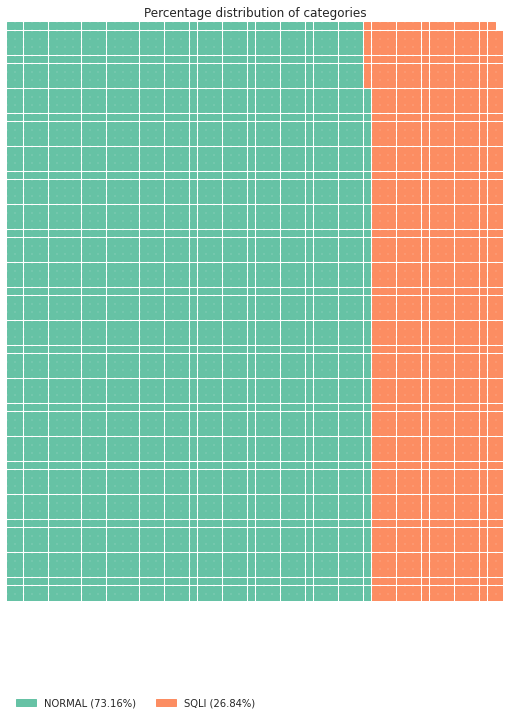

In [ ]:
percentage = data['Class'].value_counts(normalize=True) * 100
percentage = percentage.round(2)
fig = plt.figure(
    FigureClass=Waffle,
    columns=60,
    values=data['Class'].value_counts(),
    labels=["{0} ({1}%)".format(k, v) for k, v in percentage.items()],
    figsize=(18, 10),
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.2), 'ncol': len(data), 'framealpha': 0},
)
plt.title('Percentage distribution of categories')
plt.show()

In [ ]:

##Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import plotly.offline as py
from sklearn import tree,linear_model,neighbors, svm
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV, KFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,f1_score,precision_score
from sklearn.exceptions import ConvergenceWarning
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import time
import matplotlib.pyplot as plt
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [ ]:
## For ignoring warnings to view clean output
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
## Importing the dataset
data = pd.read_csv('/content/drive/MyDrive/SQLI/sqli_modified.csv', header=0)
data.head(3)

,Sentence,Label,Class
0,a,1,SQLI
1,a',1,SQLI
2,a' --,1,SQLI


In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:, 2]

In [ ]:
# Shows the columns with their number of categories each variable is having
for col in data.columns:
    print(col, ':', len(data[col].unique()), 'categories')

Sentence : 3921 categories
Label : 2 categories
Class : 2 categories


In [ ]:
pd.get_dummies(data,drop_first=True).shape

(4199, 3921)

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X.shape

(4199, 3920)

In [ ]:
### Checking for data imbalance
y.value_counts()

NORMAL    3072
SQLI      1127
Name: Class, dtype: int64

In [ ]:
print('SQLI: ' + str(round(data['Class'].value_counts()['SQLI'] / len(data) * 100, 2)) + '%\n NORMAL: ' +
      str(round(data['Class'].value_counts()['NORMAL'] / len(data) * 100, 2)))

SQLI: 26.84%
 NORMAL: 73.16


# Splitting the dataset into training and test data for normal distribution

In [ ]:
X_train_over,X_test_over,y_train_over,y_test_over = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Print class frequencies
pd.Series(y).value_counts()

NORMAL    3072
SQLI      1127
Name: Class, dtype: int64

In [ ]:
# print the shapes of our training and test set
print(X_train_over.shape)
print(X_test_over.shape)
print(y_train_over.shape)
print(y_test_over.shape)

(3359, 3920)
(840, 3920)
(3359,)
(840,)


In [ ]:
y_test_over.value_counts()

NORMAL    588
SQLI      252
Name: Class, dtype: int64

Model Evaluation : F1 Macro
Macro F1-score will give the same importance to each label/ class. It will be low for models that only perform well on the common classes while performing poorly on the rare classes.*

1. Logistic Regression

In [ ]:
start_time = time.time()
LR_model = linear_model.LogisticRegression()
# feeding the training data into the model
LR_model.fit(X_train_over, y_train_over)
print("Execution time: " + str((time.time() - start_time)) + ' sec')

Execution time: 0.6765115261077881 sec


In [ ]:
# predicting the values for x-test
y_pred = LR_model.predict(X_test_over)
# finding the training and testing accuracy
name = ['SQLI','NORMAL']
LR_r=recall_score(y_test_over,y_pred, average='macro')
LR_p=precision_score(y_test_over,y_pred, average='macro')
LR_f=f1_score(y_test_over,y_pred, average='macro')
acc=accuracy_score(y_test_over,y_pred)


print("Confusion Matrix: - \n",confusion_matrix(y_test_over, y_pred))
print()
print("Classification Report: - \n",classification_report(y_test_over, y_pred,target_names=name))
print("Recall:", LR_r)
print("Precision:", LR_p)
print("F1 score:", LR_f)
print("Accuracy:", acc)

Confusion Matrix: - 
 [[588   0]
 [  0 252]]

Classification Report: - 
               precision    recall  f1-score   support

        SQLI       1.00      1.00      1.00       588
      NORMAL       1.00      1.00      1.00       252

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840

Recall: 1.0
Precision: 1.0
F1 score: 1.0
Accuracy: 1.0


# 2. Naive Bayes

In [ ]:
start_time = time.time()
NB_model = GaussianNB()
# feeding the training data into the model
NB_model.fit(X_train_over, y_train_over)
print("Execution time: " + str((time.time() - start_time)) + ' sec')

Execution time: 0.5133500099182129 sec


In [ ]:
# predicting the values for x-test
y_pred = NB_model.predict(X_test_over)
# finding the training and testing accuracy
name = ['SQLI','NORMAL']
NB_r=recall_score(y_test_over,y_pred, average='macro')
NB_p=precision_score(y_test_over,y_pred, average='macro')
NB_f=f1_score(y_test_over,y_pred, average='macro')
print("Confusion Matrix: - \n",confusion_matrix(y_test_over, y_pred))
print()
print("Classification Report: - \n",classification_report(y_test_over, y_pred,target_names=name))
print("Recall:", NB_r)
print("Precision:", NB_p)
print("F1 score:", NB_f)

Confusion Matrix: - 
 [[588   0]
 [  0 252]]

Classification Report: - 
               precision    recall  f1-score   support

        SQLI       1.00      1.00      1.00       588
      NORMAL       1.00      1.00      1.00       252

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840

Recall: 1.0
Precision: 1.0
F1 score: 1.0


# 3. Decision Tree

In [ ]:
start_time = time.time()
DT_model = tree.DecisionTreeClassifier()
# feeding the training data into the model
DT_model.fit(X_train_over, y_train_over)
print("Execution time: " + str((time.time() - start_time)) + ' sec')

Execution time: 0.15318584442138672 sec


In [ ]:
# predicting the values for x-test
y_pred = DT_model.predict(X_test_over)
# finding the training and testing accuracy
name = ['SQLI','NORMAL']
DT_r=recall_score(y_test_over,y_pred, average='macro')
DT_p=precision_score(y_test_over,y_pred, average='macro')
DT_f=f1_score(y_test_over,y_pred, average='macro')
print("Confusion Matrix: - \n",confusion_matrix(y_test_over, y_pred))
print()
print("Classification Report: - \n",classification_report(y_test_over, y_pred,target_names=name))
print("Recall:", DT_r)
print("Precision:", DT_p)
print("F1 score:", DT_f)

Confusion Matrix: - 
 [[588   0]
 [  0 252]]

Classification Report: - 
               precision    recall  f1-score   support

        SQLI       1.00      1.00      1.00       588
      NORMAL       1.00      1.00      1.00       252

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840

Recall: 1.0
Precision: 1.0
F1 score: 1.0


# 4. K Nearest Neighbors


In [ ]:
start_time = time.time()
knn_model = neighbors.KNeighborsClassifier()
# feeding the training data into the model
knn_model.fit(X_train_over, y_train_over)
print("Execution time: " + str((time.time() - start_time)) + ' sec')

Execution time: 0.07775664329528809 sec


In [ ]:
# predicting the values for x-test
y_pred = knn_model.predict(X_test_over)
# finding the training and testing accuracy
name = ['SQLI','NORMAL']
knn_r=recall_score(y_test_over,y_pred, average='macro')
knn_p=precision_score(y_test_over,y_pred, average='macro')
knn_f=f1_score(y_test_over,y_pred, average='macro')
print("Confusion Matrix: - \n",confusion_matrix(y_test_over, y_pred))
print()
print("Classification Report: - \n",classification_report(y_test_over, y_pred,target_names=name))
print("Recall:", knn_r)
print("Precision:", knn_p)
print("F1 score:", knn_f)

Confusion Matrix: - 
 [[588   0]
 [  0 252]]

Classification Report: - 
               precision    recall  f1-score   support

        SQLI       1.00      1.00      1.00       588
      NORMAL       1.00      1.00      1.00       252

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840

Recall: 1.0
Precision: 1.0
F1 score: 1.0


**Support** **Vector** **Machine**

In [ ]:
start_time = time.time()
svm_model = svm.SVC()
# feeding the training data into the model
svm_model.fit(X_train_over, y_train_over)
print("Execution time: " + str((time.time() - start_time)) + ' sec')

Execution time: 38.27940821647644 sec


In [ ]:
# predicting the values for x-test
y_pred = svm_model.predict(X_test_over)
# finding the training and testing accuracy
name = ['SQLI','NORMAL']
svm_r=recall_score(y_test_over,y_pred, average='macro')
svm_p=precision_score(y_test_over,y_pred, average='macro')
svm_f=f1_score(y_test_over,y_pred, average='macro')
print("Confusion Matrix: - \n",confusion_matrix(y_test_over, y_pred))
print()
print("Classification Report: - \n",classification_report(y_test_over, y_pred,target_names=name))
print("Recall:", svm_r)
print("Precision:", svm_p)
print("F1 score:", svm_f)

Confusion Matrix: - 
 [[588   0]
 [  0 252]]

Classification Report: - 
               precision    recall  f1-score   support

        SQLI       1.00      1.00      1.00       588
      NORMAL       1.00      1.00      1.00       252

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840

Recall: 1.0
Precision: 1.0
F1 score: 1.0


# 6. AdaBoost

In [ ]:
start_time = time.time()
adb_model = AdaBoostClassifier()
# feeding the training data into the model
adb_model.fit(X_train_over, y_train_over)
print("Execution time: " + str((time.time() - start_time)) + ' sec')

Execution time: 0.1758286952972412 sec


In [ ]:
# predicting the values for x-test
y_pred = adb_model.predict(X_test_over)
# finding the training and testing accuracy
name = ['SQLI','NORMAL']
adb_r=recall_score(y_test_over,y_pred, average='macro')
adb_p=precision_score(y_test_over,y_pred, average='macro')
adb_f=f1_score(y_test_over,y_pred, average='macro')
print("Confusion Matrix: - \n",confusion_matrix(y_test_over, y_pred))
print()
print("Classification Report: - \n",classification_report(y_test_over, y_pred,target_names=name))
print("Recall:", adb_r)
print("Precision:", adb_p)
print("F1 score:", adb_f)

Confusion Matrix: - 
 [[588   0]
 [  0 252]]

Classification Report: - 
               precision    recall  f1-score   support

        SQLI       1.00      1.00      1.00       588
      NORMAL       1.00      1.00      1.00       252

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840

Recall: 1.0
Precision: 1.0
F1 score: 1.0


**Random Forrest**

In [ ]:
start_time = time.time()
RF_model = RandomForestClassifier()
# feeding the training data into the model
RF_model.fit(X_train_over, y_train_over)
print("Execution time: " + str((time.time() - start_time)) + ' sec')

Execution time: 2.5946502685546875 sec


In [ ]:
# predicting the values for x-test
y_pred = RF_model.predict(X_test_over)
# finding the training and testing accuracy
name = ['SQLI','NORMAL']
RF_r=recall_score(y_test_over,y_pred, average='macro')
RF_p=precision_score(y_test_over,y_pred, average='macro')
RF_f=f1_score(y_test_over,y_pred, average='macro')
print("Confusion Matrix: - \n",confusion_matrix(y_test_over, y_pred))
print()
print("Classification Report: - \n",classification_report(y_test_over, y_pred,target_names=name))
print("Recall:", RF_r)
print("Precision:", RF_p)
print("F1 score:", RF_f)

Confusion Matrix: - 
 [[588   0]
 [  0 252]]

Classification Report: - 
               precision    recall  f1-score   support

        SQLI       1.00      1.00      1.00       588
      NORMAL       1.00      1.00      1.00       252

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840

Recall: 1.0
Precision: 1.0
F1 score: 1.0


In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(5, 10))
models=['Logistic Regression','Naive Bayes Classifier','Decision Tree Classifier','K-Nearest Neighbor','Support Vector Machine','AdaBoost','Random Forest Classifier']
fig = go.Figure(data=[go.Bar(name='recall_score', x=models, y=[LR_f,NB_f,DT_f,knn_f,svm_f,adb_f,RF_f])])
fig.show()

<Figure size 360x720 with 0 Axes>